# Real Estate Sales Analysis (2001-2022)
### Objective: This notebook analyzes real estate sales data from 2001 to 2022, including data cleaning, exploratory data analysis (EDA), and predictive modeling.


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [11]:
# Load dataset
file_path = r"C:\Users\fc\Downloads\Projects\Real_Estate_Sales_2001-2022_GL.csv"
data = pd.read_csv(file_path,low_memory=False )

In [12]:
data.head()

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Non Use Code,Assessor Remarks,OPM remarks,Location
0,220008,2022,01/30/2023,Andover,618 ROUTE 6,139020.0,232000.0,0.5992,Residential,Single Family,NaN,NaN,NaN,POINT (-72.343628962 41.728431984)
1,2020348,2020,09/13/2021,Ansonia,230 WAKELEE AVE,150500.0,325000.0,0.4630,Commercial,NaN,NaN,NaN,NaN,NaN
2,20002,2020,10/02/2020,Ashford,390 TURNPIKE RD,253000.0,430000.0,0.5883,Residential,Single Family,NaN,NaN,NaN,NaN
3,210317,2021,07/05/2022,Avon,53 COTSWOLD WAY,329730.0,805000.0,0.4096,Residential,Single Family,NaN,NaN,NaN,POINT (-72.846365959 41.781677018)
4,200212,2020,03/09/2021,Avon,5 CHESTNUT DRIVE,130400.0,179900.0,0.7248,Residential,Condo,NaN,NaN,NaN,NaN



## Data Cleaning
1. Drop unnecessary columns
2. Handle missing values
3. Convert data types

In [15]:
data.shape

(1097629, 14)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1097629 entries, 0 to 1097628
Data columns (total 14 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   Serial Number     1097629 non-null  int64  
 1   List Year         1097629 non-null  int64  
 2   Date Recorded     1097627 non-null  object 
 3   Town              1097629 non-null  object 
 4   Address           1097578 non-null  object 
 5   Assessed Value    1097629 non-null  float64
 6   Sale Amount       1097629 non-null  float64
 7   Sales Ratio       1097629 non-null  float64
 8   Property Type     715183 non-null   object 
 9   Residential Type  699240 non-null   object 
 10  Non Use Code      313451 non-null   object 
 11  Assessor Remarks  171228 non-null   object 
 12  OPM remarks       13031 non-null    object 
 13  Location          298111 non-null   object 
dtypes: float64(3), int64(2), object(9)
memory usage: 117.2+ MB


In [17]:
data.nunique()

Serial Number        96220
List Year               22
Date Recorded         6958
Town                   170
Address             771931
Assessed Value       99306
Sale Amount          61075
Sales Ratio         552974
Property Type           11
Residential Type         5
Non Use Code            74
Assessor Remarks     75286
OPM remarks           6490
Location            216556
dtype: int64

In [18]:
data_cleaned=data.drop(columns=['Non Use Code','Assessor Remarks' , 'OPM remarks', 'Location'])

In [19]:
data_cleaned['Date Recorded'] = pd.to_datetime(data_cleaned['Date Recorded'], errors='coerce')

In [20]:
data_cleaned = data_cleaned.dropna(subset=['Sale Amount', 'Assessed Value'])

In [21]:
data_cleaned['Property Type'] = data_cleaned['Property Type'].fillna('Unknown')
data_cleaned['Residential Type'] = data_cleaned['Residential Type'].fillna('Unknown')

In [22]:
data_cleaned.shape

(1097629, 10)

In [24]:
data_cleaned.isnull().sum()

Serial Number        0
List Year            0
Date Recorded        2
Town                 0
Address             51
Assessed Value       0
Sale Amount          0
Sales Ratio          0
Property Type        0
Residential Type     0
dtype: int64

In [25]:
data_cleaned = data_cleaned.dropna(subset=['Date Recorded', 'Address'])


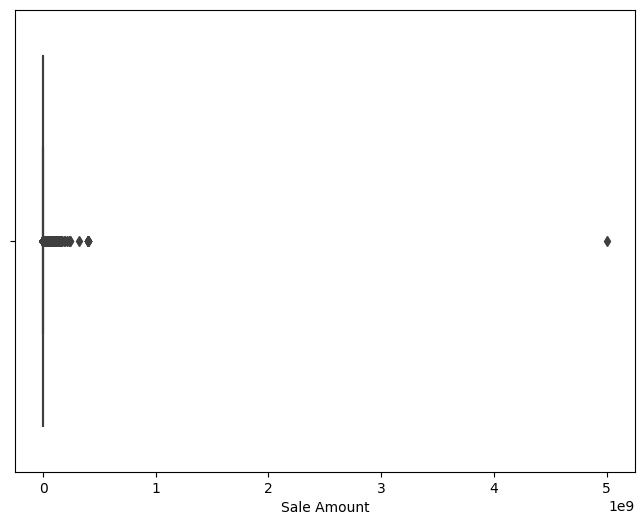

In [29]:
# Checking outliers for 'Sale Amount'
plt.figure(figsize=(8, 6))
sns.boxplot(x=data_cleaned['Sale Amount'])
plt.show()


In [31]:
from IPython.display import display, HTML
high_sales = data_cleaned[data_cleaned['Sale Amount'] > 500000000]

display(HTML(high_sales.to_html(classes='table table-bordered table-hover table-condensed', escape=False)))

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type
75719,20200091,2020,2021-08-19,Willington,456 TOLLAND TPKE,2238530.00,5000000000.00,0.00,Apartments,Unknown


In [33]:
# Remove outliers from the 'Sale Amount' column
Q1 = data_cleaned['Sale Amount'].quantile(0.25)
Q3 = data_cleaned['Sale Amount'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

data_cleaned = data_cleaned[(data_cleaned['Sale Amount'] >= lower_bound) & (data_cleaned['Sale Amount'] <= upper_bound)]

data_cleaned.shape


(1004209, 10)

## Exploratory Data Analysis (EDA)
1. Summary statistics
2. Visualizations (histograms, boxplots, sales trends)

In [26]:
print(data_cleaned.describe())

       Serial Number     List Year  Assessed Value   Sale Amount   Sales Ratio
count   1.097578e+06  1.097578e+06    1.097578e+06  1.097578e+06  1.097578e+06
mean    5.370584e+05  2.011219e+03    2.818110e+05  4.053209e+05  9.604324e+00
std     7.526248e+06  6.773461e+00    1.657927e+06  5.143607e+06  1.801706e+03
min     2.100000e+01  2.001000e+03    0.000000e+00  0.000000e+00  0.000000e+00
25%     3.071200e+04  2.005000e+03    8.910000e+04  1.450000e+05  4.778919e-01
50%     8.070850e+04  2.011000e+03    1.405900e+05  2.330000e+05  6.105882e-01
75%     1.703420e+05  2.018000e+03    2.282700e+05  3.750000e+05  7.707259e-01
max     2.000500e+09  2.022000e+03    8.815100e+08  5.000000e+09  1.226420e+06


In [27]:
pd.set_option('display.float_format', '{:.2f}'.format)

data_cleaned.describe()

,Serial Number,List Year,Assessed Value,Sale Amount,Sales Ratio
count,1097578.00,1097578.00,1097578.00,1097578.00,1097578.00
mean,537058.38,2011.22,281810.97,405320.89,9.60
std,7526247.64,6.77,1657926.78,5143607.38,1801.71
min,21.00,2001.00,0.00,0.00,0.00
25%,30712.00,2005.00,89100.00,145000.00,0.48
50%,80708.50,2011.00,140590.00,233000.00,0.61
75%,170342.00,2018.00,228270.00,375000.00,0.77
max,2000500023.00,2022.00,881510000.00,5000000000.00,1226420.00


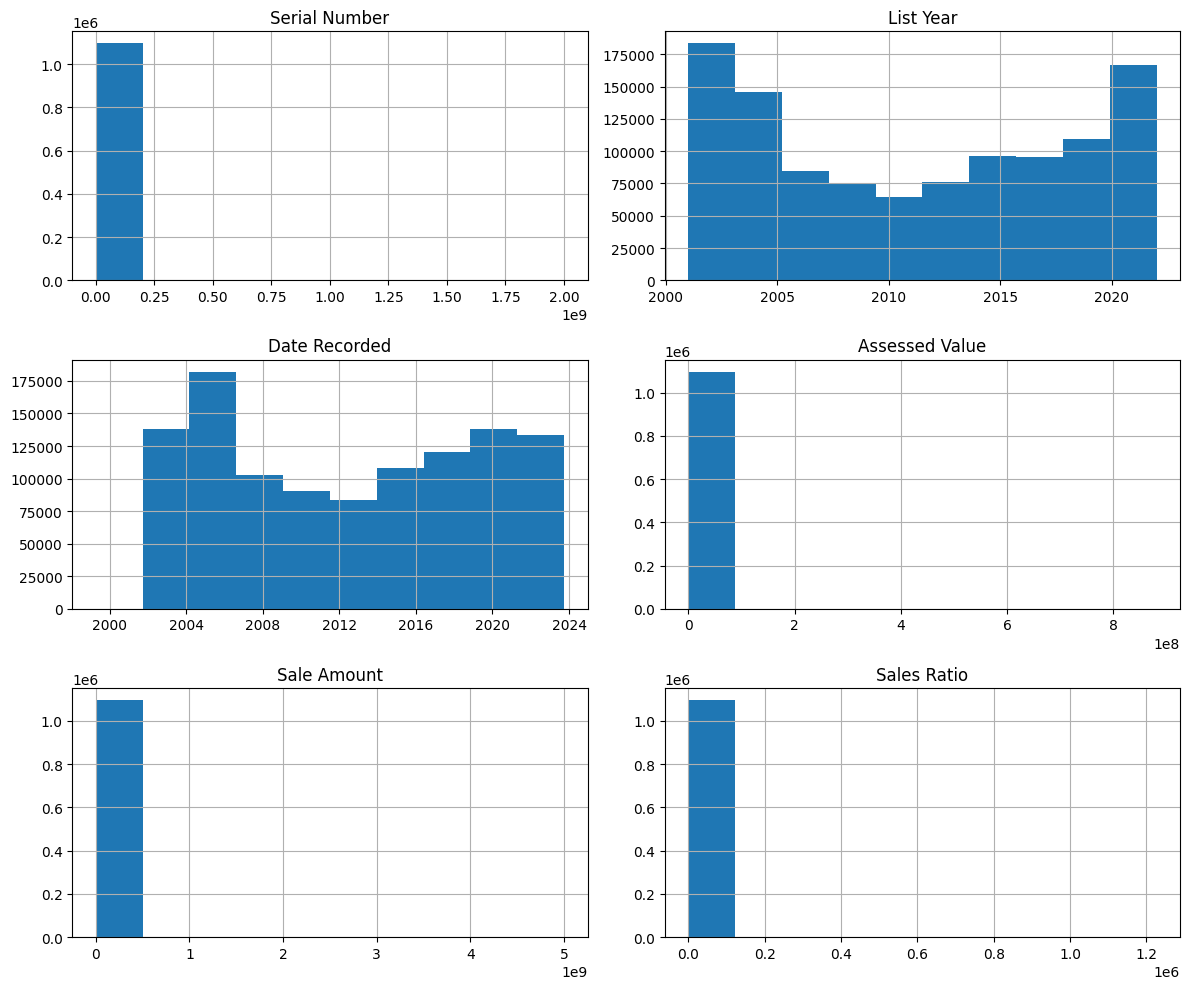

In [28]:
# Histogram of numerical features
data_cleaned.hist(figsize=(12, 10))
plt.tight_layout()
plt.show()

In [57]:
yearly_data = pd.DataFrame({
    'Frequency': data_cleaned.groupby('Year')['Serial Number'].count(),
    'SalesAmount': data_cleaned.groupby('Year')['Sale Amount'].sum()
})

correlation = yearly_data['Frequency'].corr(yearly_data['SalesAmount'])
print(f"Correlation: {correlation:.2f}")

Correlation: 0.96


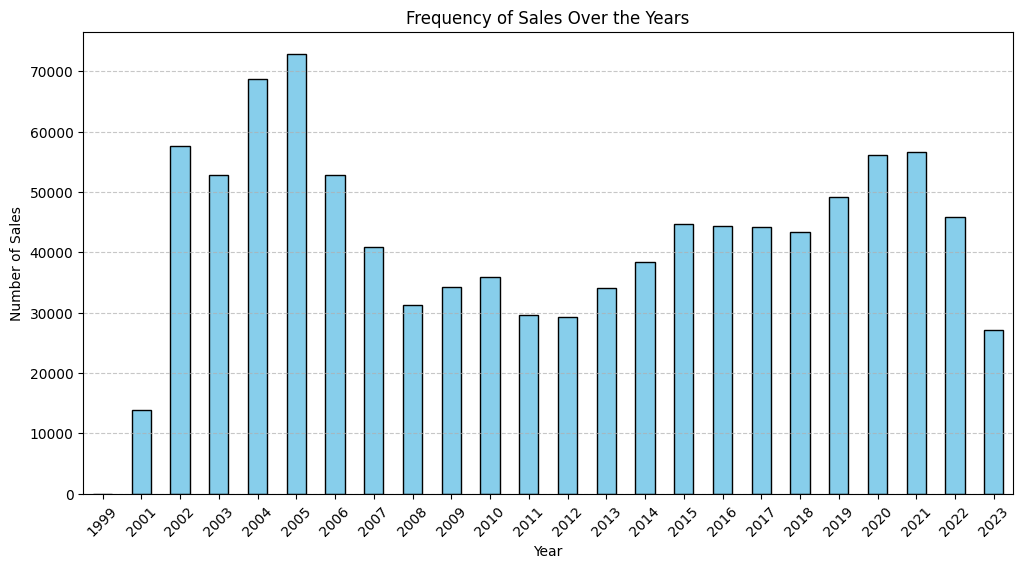

In [41]:
# Plot sales frequency over the years

sales_frequency = data_cleaned['Year'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
sales_frequency.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Frequency of Sales Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Sales')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

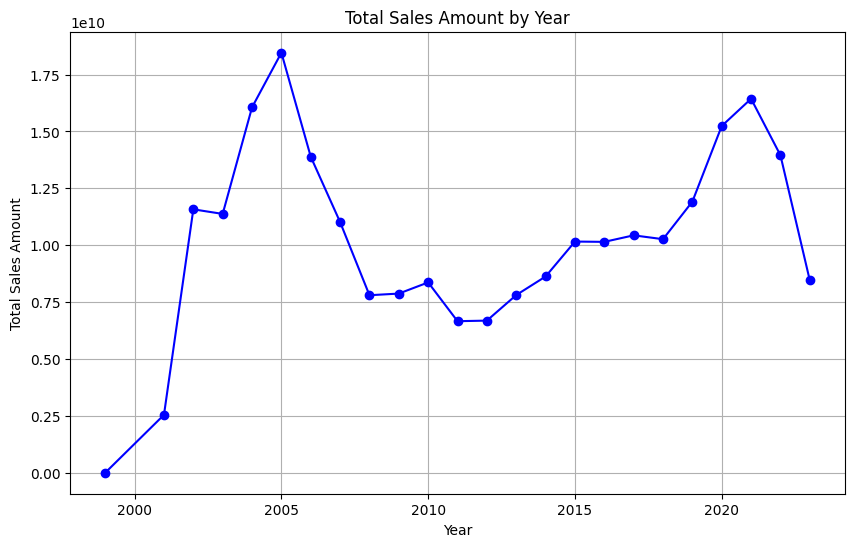

In [36]:
# Sales trends over years
data_cleaned['Year'] = data_cleaned['Date Recorded'].dt.year
sales_by_year = data_cleaned.groupby('Year')['Sale Amount'].sum()

plt.figure(figsize=(10, 6))
plt.plot(sales_by_year.index, sales_by_year.values, marker='o', color='blue')
plt.title('Total Sales Amount by Year')
plt.xlabel('Year')
plt.ylabel('Total Sales Amount')
plt.grid(True)
plt.show()


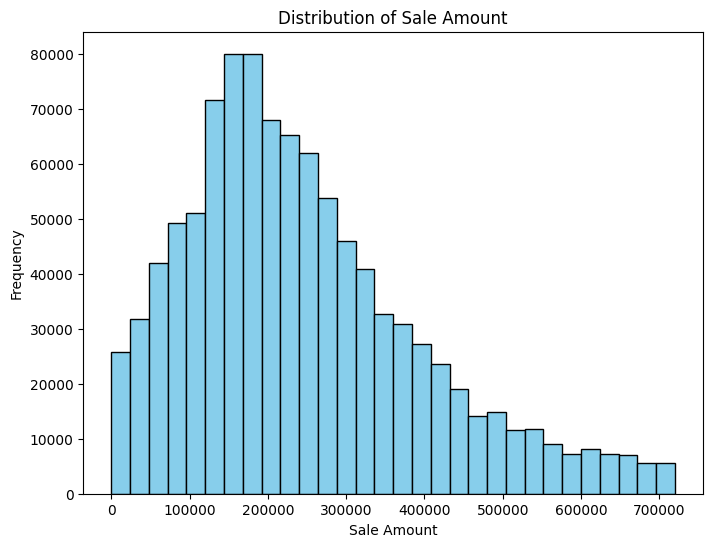

In [39]:
plt.figure(figsize=(8,6))
plt.hist(data_cleaned['Sale Amount'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Sale Amount')
plt.xlabel('Sale Amount')
plt.ylabel('Frequency')
plt.show()

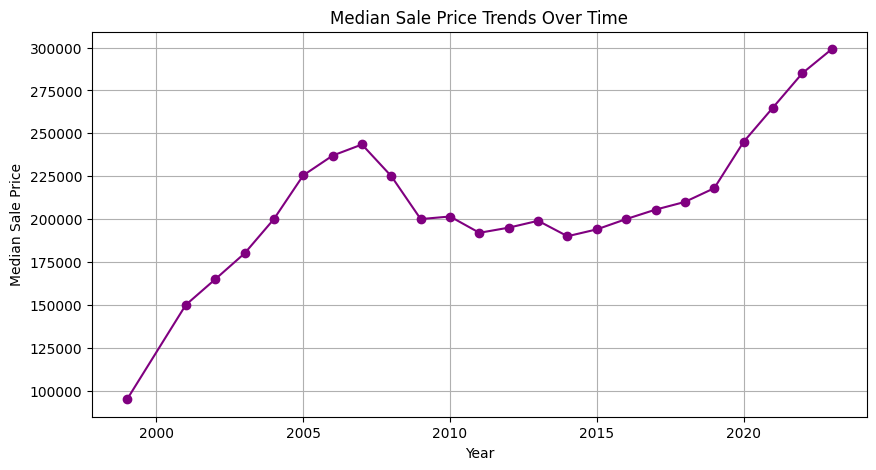

In [58]:
#  Median Sale Price Trends Analysis 
median_price_by_year = data_cleaned.groupby('Year')['Sale Amount'].median()
plt.figure(figsize=(10, 5))
plt.plot(median_price_by_year.index, median_price_by_year.values, marker='o', linestyle='-', color='purple')
plt.xlabel('Year')
plt.ylabel('Median Sale Price')
plt.title('Median Sale Price Trends Over Time')
plt.grid(True)
plt.show()

In [37]:
# Town-wise Sale Analysis
sales_by_town = data_cleaned.groupby('Town')['Sale Amount'].sum().sort_values(ascending=False)
print("Town with Highest Sales:", sales_by_town.idxmax())

Town with Highest Sales: Stamford


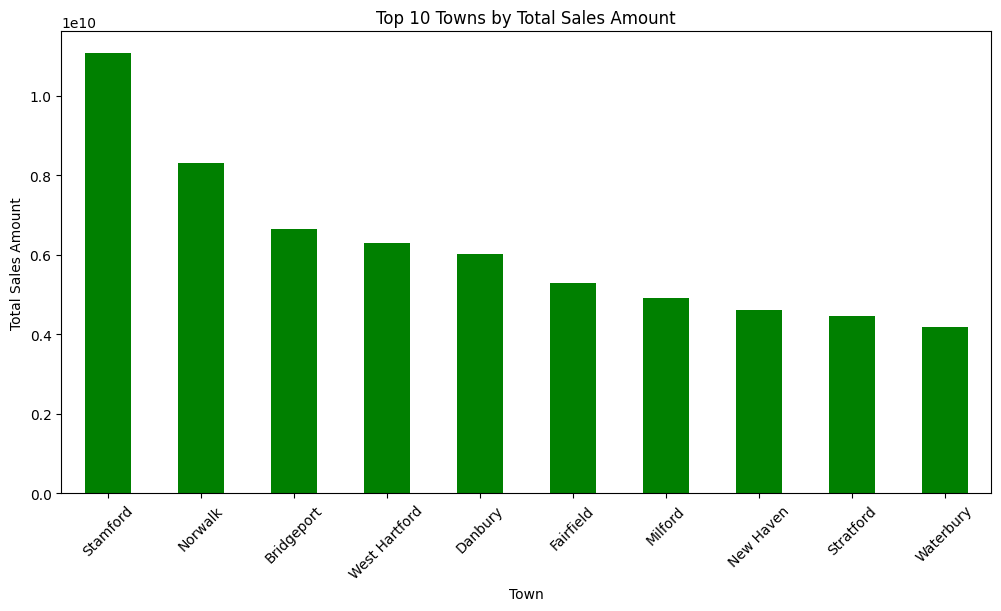

In [38]:
# Top 10 towns by sale
plt.figure(figsize=(12, 6))
sales_by_town[:10].plot(kind='bar', color='green')
plt.title('Top 10 Towns by Total Sales Amount')
plt.ylabel('Total Sales Amount')
plt.xlabel('Town')
plt.xticks(rotation=45)
plt.show()


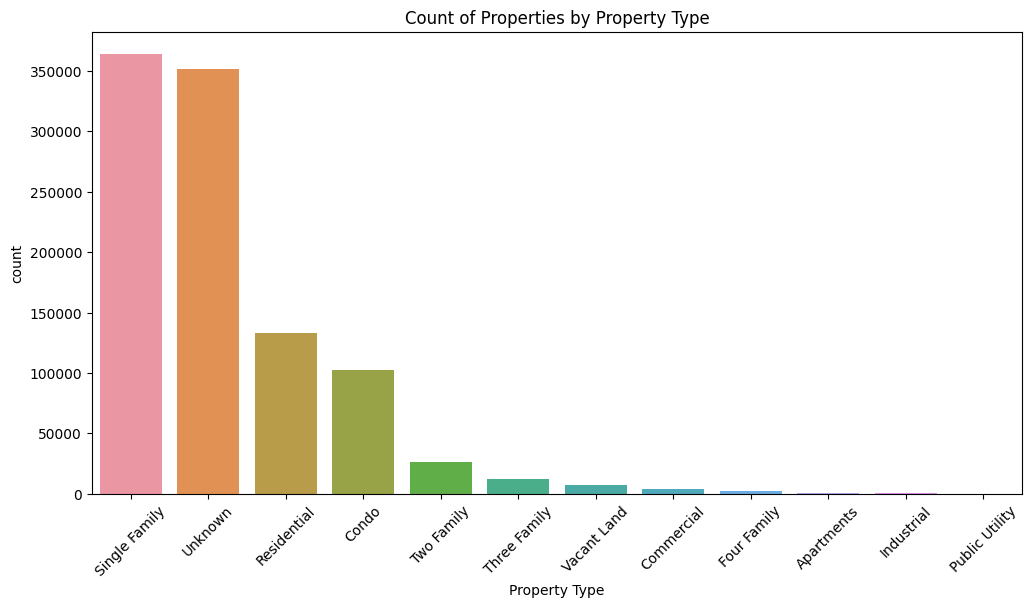

In [42]:
# Count of Properties by Property Type
plt.figure(figsize=(12,6))
sns.countplot(data=data_cleaned_no_outliers,x='Property Type',order=data_cleaned_no_outliers['Property Type'].value_counts().index)
plt.title('Count of Properties by Property Type')
plt.xticks(rotation=45)
plt.show()

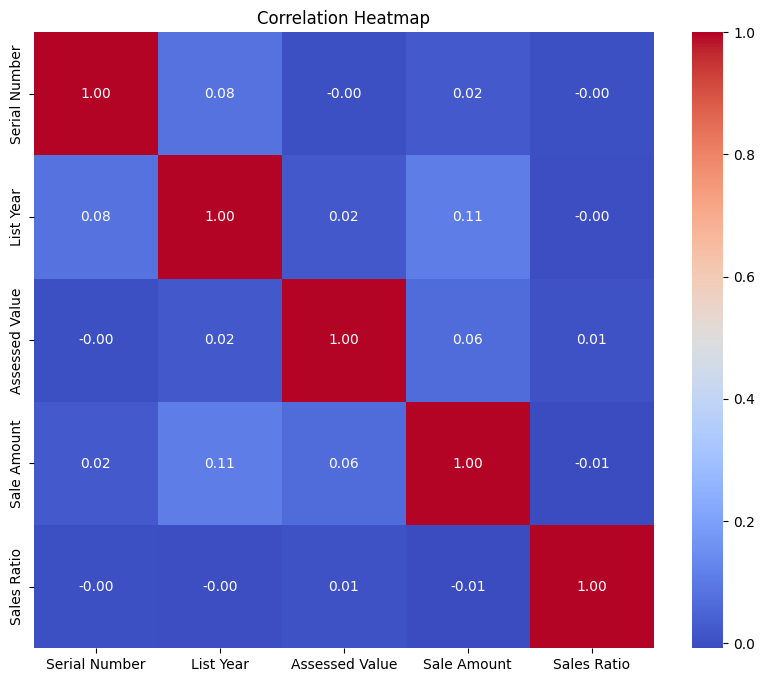

In [43]:
# Correlation Heatmap
plt.figure(figsize=(10,8))
correlation_matrix = data_cleaned_no_outliers.corr()
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt ='.2f')
plt.title('Correlation Heatmap')
plt.show()

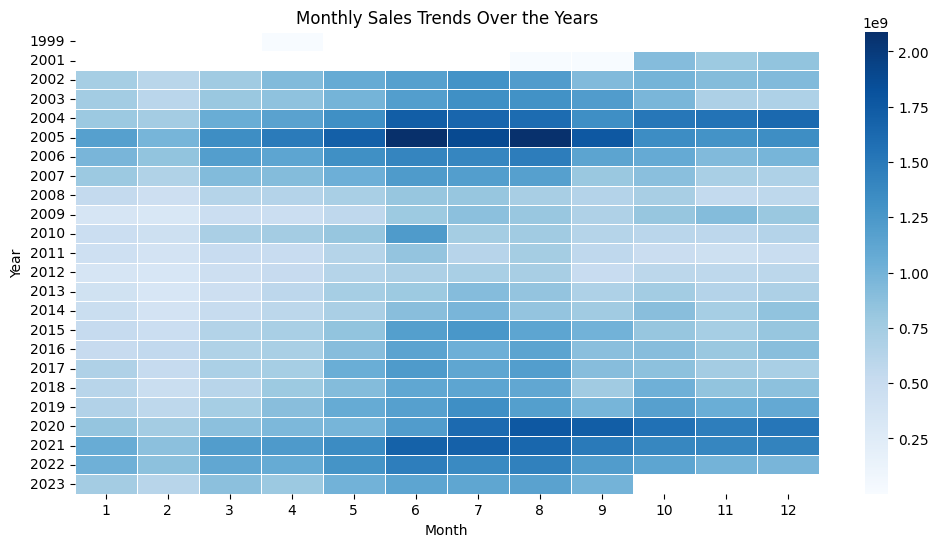

In [46]:
# Monthly Sales Trends Over the Years
data_cleaned['Month'] = data_cleaned['Date Recorded'].dt.month

sales_trends = data_cleaned.groupby(['Year', 'Month'])['Sale Amount'].sum().unstack()

plt.figure(figsize=(12, 6))
sns.heatmap(sales_trends, cmap='Blues', annot=False, cbar=True, linewidths=0.5)
plt.title('Monthly Sales Trends Over the Years')
plt.xlabel('Month')
plt.ylabel('Year')
plt.show()


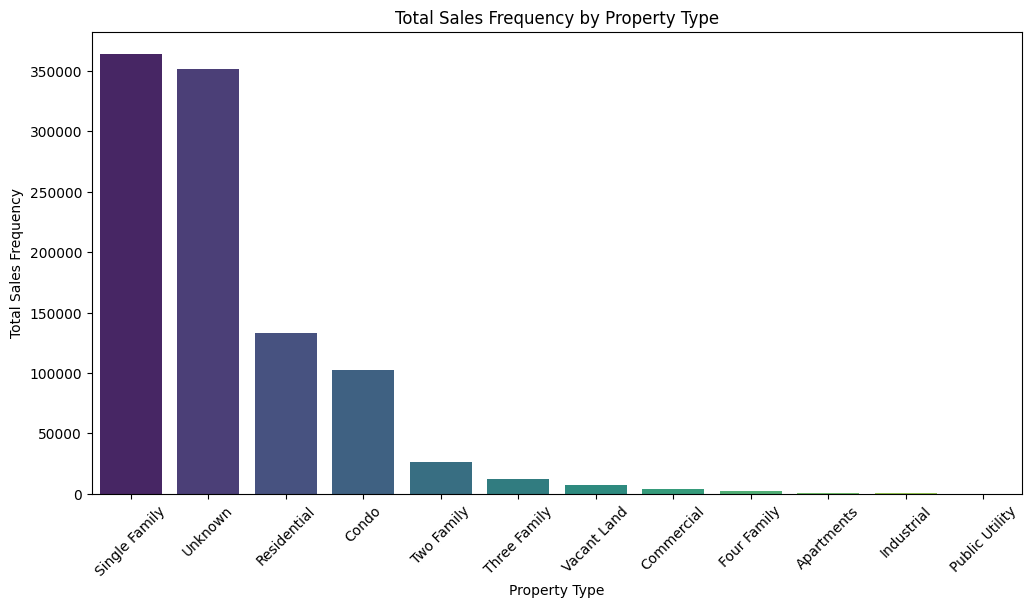

In [51]:
# Total sales frequency by property type
sales_freq_by_property = data_cleaned['Property Type'].value_counts()
plt.figure(figsize=(12, 6))
sns.barplot(x=sales_freq_by_property.index, y=sales_freq_by_property.values, palette='viridis')
plt.xlabel('Property Type')
plt.ylabel('Total Sales Frequency')
plt.title('Total Sales Frequency by Property Type')
plt.xticks(rotation=45)
plt.show()

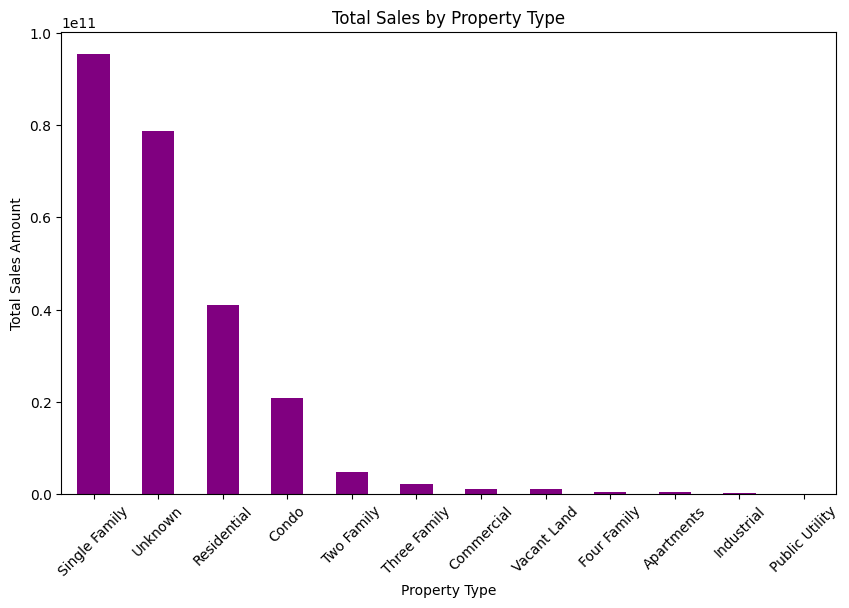

In [50]:
# Total sales by property type
sales_by_property_type = data_cleaned.groupby('Property Type')['Sale Amount'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sales_by_property_type.plot(kind='bar', color='purple')
plt.title('Total Sales by Property Type')
plt.ylabel('Total Sales Amount')
plt.xlabel('Property Type')
plt.xticks(rotation=45)
plt.show()


In [53]:
# Top towns by sum of sales amount by year
sales_by_town_year = data_cleaned.groupby(['Year', 'Town'])['Sale Amount'].sum()

top_towns_per_year = sales_by_town_year.groupby('Year').idxmax()

for year, town in top_towns_per_year.items():
    print(f"In {year}, the top town was {town[1]} with sales of {sales_by_town_year[year, town[1]]}")

In 1999, the top town was New London with sales of 95000.0
In 2001, the top town was Stamford with sales of 159320574.0
In 2002, the top town was Stamford with sales of 758919774.0
In 2003, the top town was Stamford with sales of 787136323.0
In 2004, the top town was Stamford with sales of 958794444.0
In 2005, the top town was Stamford with sales of 914520150.0
In 2006, the top town was Bridgeport with sales of 706403518.0
In 2007, the top town was Norwalk with sales of 535892373.0
In 2008, the top town was West Hartford with sales of 298266829.0
In 2009, the top town was Stamford with sales of 361965975.0
In 2010, the top town was Stamford with sales of 394661870.0
In 2011, the top town was Stamford with sales of 360238446.0
In 2012, the top town was Norwalk with sales of 269766238.0
In 2013, the top town was Fairfield with sales of 315224127.0
In 2014, the top town was Stamford with sales of 482007915.0
In 2015, the top town was Stamford with sales of 553983146.0
In 2016, the top tow

Yearly Growth Rate (2002-2023):
Year
2002      NaN
2003    -1.74
2004    41.17
2005    14.96
2006   -24.76
2007   -20.68
2008   -29.19
2009     0.93
2010     6.23
2011   -20.38
2012     0.38
2013    16.81
2014    10.44
2015    17.81
2016    -0.13
2017     2.83
2018    -1.62
2019    16.09
2020    27.89
2021     7.85
2022   -15.11
2023   -39.40
Name: Sale Amount, dtype: float64


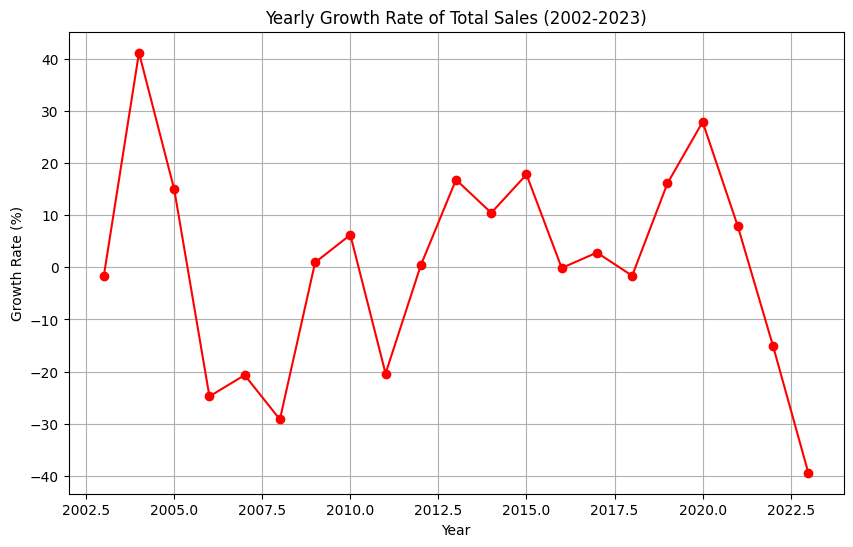

In [55]:
# Yearly growth rate for sales
yearly_sales = data_cleaned.groupby('Year')['Sale Amount'].sum()

yearly_sales_filtered = yearly_sales[yearly_sales.index >2001]

yearly_growth_rate = yearly_sales_filtered.pct_change() * 100

print("Yearly Growth Rate (2002-2023):")
print(yearly_growth_rate)

plt.figure(figsize=(10, 6))
yearly_growth_rate.plot(marker='o', color='red')
plt.title('Yearly Growth Rate of Total Sales (2002-2023)')
plt.xlabel('Year')
plt.ylabel('Growth Rate (%)')
plt.grid(True)
plt.show()


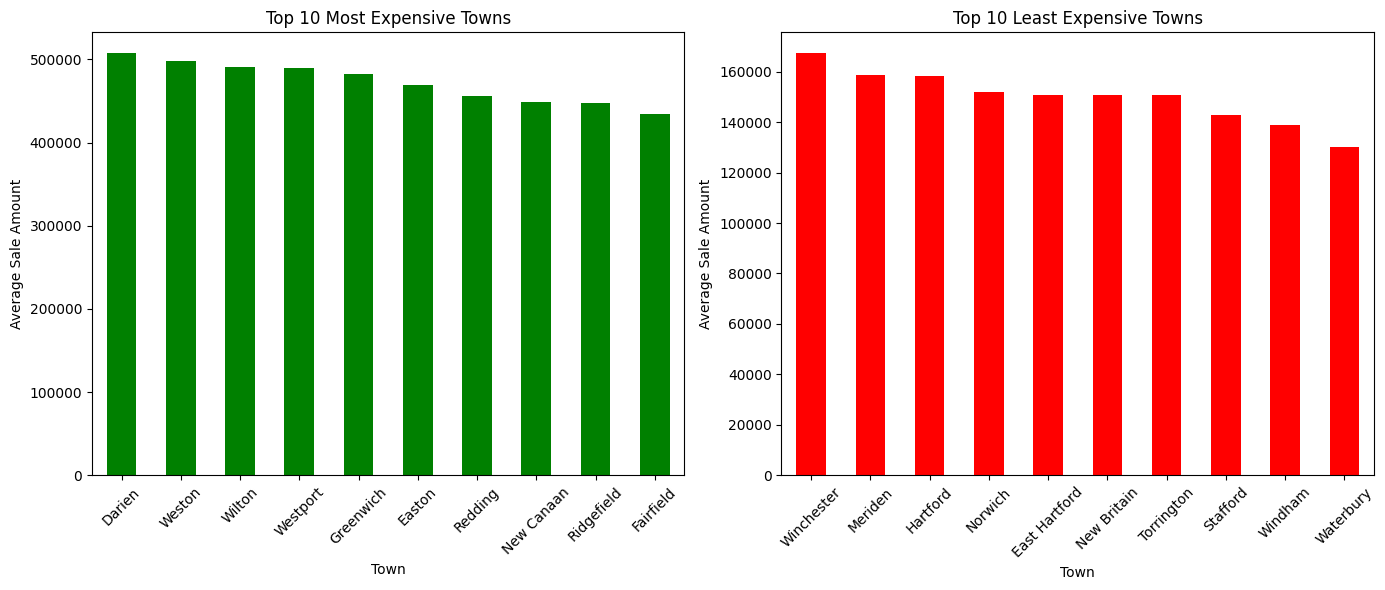

In [56]:
# Average sale price per town
avg_sale_by_town = data_cleaned_no_outliers.groupby('Town')['Sale Amount'].mean().sort_values(ascending=False)

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
avg_sale_by_town[:10].plot(kind='bar', color='green')
plt.title('Top 10 Most Expensive Towns')
plt.ylabel('Average Sale Amount')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
avg_sale_by_town[-10:].plot(kind='bar', color='red')
plt.title('Top 10 Least Expensive Towns')
plt.ylabel('Average Sale Amount')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()
